**CARGA DE IMAGENES DE CLASIFICACION BINARIA / INICIALIZACION DE LA RED CON NEURONAS**

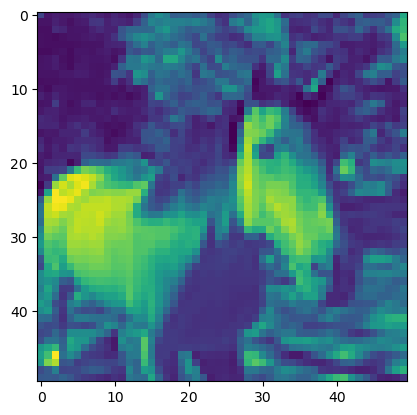

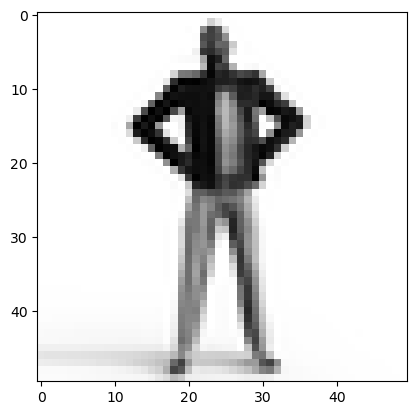

c:\Users\danie\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\danie\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [143]:

import numpy as np
from RedNeu import cost, backprop , predict,initialize_parameters,update_parameters
import pandas as pd
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.io import loadmat, savemat
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# En caso de solo tener un data set /Habria que mencionar que se podria estar usando kfold validation

##data = loadmat('imageset.mat', squeeze_me=True)
##X= pd.DataFrame(data['X'])
##y=pd.DataFrame(data['y'])
# X, X2, y, y2 = train_test_split(X, y, test_size=0.15, random_state=42)


data = loadmat('trainset.mat', squeeze_me=True)

data2 = loadmat('testset.mat', squeeze_me=True)

X= pd.DataFrame(data['X'])
y=pd.DataFrame(data['y'])

X2= pd.DataFrame(data2['Xtest']);
y2=pd.DataFrame(data2['ytest'])


numeroImagen=600; ##Ejemplo caballo
imagen_prueba = X.iloc[numeroImagen, :].values
# Dependiendo de la estructura de los datos, es posible que necesites manipular la forma de la imagen
# Aquí, suponemos que cada fila de X es una imagen y la convertimos a un array numpy
imagen_prueba = np.array(imagen_prueba).reshape((50,50))  


numeroImagen=30; ##Ejemplo persona
imagen_prueba2 = X2.iloc[numeroImagen, :].values
# Dependiendo de la estructura de los datos, es posible que necesites manipular la forma de la imagen
# Aquí, suponemos que cada fila de X es una imagen y la convertimos a un array numpy
imagen_prueba2 = np.array(imagen_prueba2).reshape((50,50))  

# Ahora, puedes visualizar la imagen 
plt.imshow(imagen_prueba)  # Asegúrate de ajustar el mapa de colores según tus datos
plt.show()
plt.imshow(imagen_prueba2,cmap='gray')  # Asegúrate de ajustar el mapa de colores según tus datos
plt.show()


# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
X2 = scaler.transform(X2)

# Añadir el sesgo a los conjuntos de entrenamiento y prueba
X_train_with_bias = np.hstack([np.ones((len(X), 1)), X])
X_test_with_bias = np.hstack([np.ones((len(X2), 1)), X2])


# PRUEBA PARA VER QUE EN LA IMAGEN FUNCIONA EL MULTICLASE
#AÑADIMOS AL ARCHIVO . MAT VARIAS CLASES   "FAKE"
percentage_to_replace = 15  # Adjust this percentage as needed
random_indices_y = np.random.choice(len(y), int(len(y) * percentage_to_replace / 100), replace=False)
random_indices_y2 = np.random.choice(len(y2), int(len(y2) * percentage_to_replace / 100), replace=False)
y.iloc[random_indices_y] = 2
y2.iloc[random_indices_y2] = 2


# Con esto si imprimer un array te imprime todop
##pd.set_option('display.max_rows', None)


#SOLO SI ES MULTICLASE Y NO CLASIFICAION BINARIA 
# Convertir y_train_split a una matriz de etiquetas one-hot
encoder = OneHotEncoder(sparse=False)
Y_train_onehot = encoder.fit_transform(y.to_numpy().reshape(-1, 1))
Y_test_onehot = encoder.fit_transform(y2.to_numpy().reshape(-1, 1))


# Asegurarse de que y e y2 tengan la forma adecuada

y = pd.DataFrame(Y_train_onehot)
y2 = pd.DataFrame(Y_test_onehot)

##Tantas neuronas de entrada como datos , y de salida si es binaria 1( o 1 o 0) y si es multi las que tenga y
layer_sizes = [X.shape[1] ,5,Y_train_onehot.shape[1]]  # Ajusta el número de neuronas según sea necesario
theta_list = initialize_parameters(layer_sizes)



**ENTRENAMIENTO DEL MLP**

In [144]:

# Ajustar hiperparámetros
lambdaValue = 0.35  # Experimenta con diferentes valores
alpha = 0.1  # Experimenta con diferentes valores
iterations = 500  # Experimenta con diferentes valores



# Paso 3: Entrenamiento del perceptrón multicapa
for _ in range(iterations):
    J, grad = backprop(theta_list, X_train_with_bias, y, lambdaValue)
    # Actualizar parámetros
    update_parameters(theta_list, grad, alpha)

**Prediccion de los datos y calculo de metricas de medida de rendimiento**


In [145]:

# Paso 4: Evaluación del perceptrón multicapa
predictions_test = predict(theta_list, X_test_with_bias)

# Obtener las etiquetas predichas (como índices de la clase con probabilidad máxima)
predicted_labels_test = np.argmax(predictions_test, axis=1)
# Obtener las etiquetas reales
true_labels_test = np.argmax(Y_test_onehot, axis=1)


accuracy_test = accuracy_score(true_labels_test, predicted_labels_test)
# Calcular la matriz de confusión
conf_matrix_test = confusion_matrix(true_labels_test, predicted_labels_test)



# Obtener True Positives (Verdaderos Positivos) y False Positives (Falsos Positivos) de la matriz de confusión
##ESTO SE HACE ASI POR QUE ES CLASIFICACION BINARIA ,EN ESTE EJEMPLO:  O PERSONA O CABALLO 
##SI ESTO FUESE MULTICLASE HABRIA QUE HACER UNA CLASE POSITIVA PARA CADA ETIQUETA
# Obtener True Positives (Verdaderos Positivos) y False Positives (Falsos Positivos) de la matriz de confusión
true_positives_class_1 = conf_matrix_test[1, 1]  # Posición [1, 1] para la clase positiva (1)
false_positives_class_1 = conf_matrix_test[0, 1]  # Posición [0, 1] para la clase negativa (0) clasificada como positiva (1)
# Obtener True Negatives (Verdaderos Negativos) y False Negatives (Falsos Negativos) de la matriz de confusión
true_negatives_class_0 = conf_matrix_test[0, 0]  # Posición [0, 0] para la clase negativa (0)
false_negatives_class_0 = conf_matrix_test[1, 0]  # Posición [1, 0] para la clase positiva (1) clasificada como negativa (0)



# Calcular Precision para la clase positiva (1)
precision_class_1 = true_positives_class_1 / (true_positives_class_1 + false_positives_class_1) if (true_positives_class_1 + false_positives_class_1) > 0 else 0
# Calcular Precision para la clase negativa (0)
precision_class_0 = true_negatives_class_0 / (true_negatives_class_0 + false_negatives_class_0) if (true_negatives_class_0 + false_negatives_class_0) > 0 else 0


class_names= ['CABALLO','PERSONA','OTRO']
report = classification_report(true_labels_test, predicted_labels_test,target_names=class_names)

c:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**IMPRESION DE LOS RESULTADOS OBTENIDOS**

In [146]:
print(f'Costo de la red neuronal en entrenamiento: {cost(theta_list, X_train_with_bias, Y_train_onehot, lambdaValue):.2f}%')
print(f'Costo de la red neuronal en prueba: {cost(theta_list, X_test_with_bias, Y_test_onehot, lambdaValue):.2f}%')
print(f'Accuracy : {accuracy_test * 100:.2f}%')
# Imprimir la matriz de confusión
print("Matriz de Confusión Test:")
print(conf_matrix_test)
# SE HACE ASI POR QUE SOLO HAY DOS CLASES ES BINARIA , SI FUESE MULTICLASE PONRIAMOS LAS QUE NOS INTERESEN
print(report)
print("\nExplicaciones:")
print("Precision: Es la proporción de instancias clasificadas como positivas que son realmente positivas.")
print("Recall: Es la proporción de instancias positivas que fueron correctamente clasificadas como positivas.")
print("F1-score: Es la media armónica ponderada de precision y recall. Es útil cuando hay desbalance de clases.")
print("Support: Es el número real de ocurrencias de la clase en el conjunto de prueba.")
print("Accuracy: Es la proporción de instancias correctamente clasificadas en el conjunto de prueba.")
print("Macro avg: Es el promedio no ponderado de precision, recall y f1-score para todas las clases.")
print("Weighted avg: Es el promedio ponderado por el soporte (número de instancias) de precision, recall y f1-score.")

Costo de la red neuronal en entrenamiento: 0.99%
Costo de la red neuronal en prueba: 1.40%
Accuracy : 72.27%
Matriz de Confusión Test:
[[93 18  0]
 [15 92  0]
 [21 17  0]]
              precision    recall  f1-score   support

     CABALLO       0.72      0.84      0.77       111
     PERSONA       0.72      0.86      0.79       107
        OTRO       0.00      0.00      0.00        38

    accuracy                           0.72       256
   macro avg       0.48      0.57      0.52       256
weighted avg       0.62      0.72      0.66       256


Explicaciones:
Precision: Es la proporción de instancias clasificadas como positivas que son realmente positivas.
Recall: Es la proporción de instancias positivas que fueron correctamente clasificadas como positivas.
F1-score: Es la media armónica ponderada de precision y recall. Es útil cuando hay desbalance de clases.
Support: Es el número real de ocurrencias de la clase en el conjunto de prueba.
Accuracy: Es la proporción de instancias cor

In [147]:
##PERCEPTRON DE SKLEARN
from sklearn.neural_network import MLPClassifier


##IMPORTANTE : SOBRE ESTE MODELO NO AÑADIMOS EL SESGO 
##EL MODELO INTEPRETA AUTOMATICAMENTE EL NUMERO DE CAPAS
mlp_sklearn = MLPClassifier(
    hidden_layer_sizes=(5,),  # Ajustar el número de neuronas en la capa oculta según sea necesario
    activation='relu',        # Usar la función de activación ReLU debido a la multiclasificacion
    max_iter=500,             # Número máximo de iteraciones
    alpha=0.1,               # Término de regularización
    learning_rate_init=0.5,   # Tasa de aprendizaje inicial
    random_state=42
)
mlp_sklearn.fit(X, Y_train_onehot)  # Ajustar el modelo

# Hacer predicciones en el conjunto de prueba
predictions_sklearn = mlp_sklearn.predict(X2)
# Obtener las etiquetas predichas (como índices de la clase con probabilidad máxima)
predicted_labels_test = np.argmax(predictions_sklearn, axis=1)
# Obtener las etiquetas reales
true_labels_test = np.argmax(Y_test_onehot, axis=1)

# Calcular métricas de evaluación del modelo de Scikit-Learn
accuracy_sklearn = accuracy_score(true_labels_test, predicted_labels_test)
conf_matrix_sklearn = confusion_matrix(true_labels_test, predicted_labels_test)
report_sklearn = classification_report(true_labels_test, predicted_labels_test, target_names=class_names)


print("\nResultados del Perceptrón Multicapa de Scikit-Learn:")
print(f'Accuracy: {accuracy_sklearn * 100:.2f}%')
print("Matriz de Confusión Test:")
print(conf_matrix_sklearn)
print(report_sklearn)


Resultados del Perceptrón Multicapa de Scikit-Learn:
Accuracy: 75.00%
Matriz de Confusión Test:
[[ 86  25   0]
 [  1 106   0]
 [ 13  25   0]]
              precision    recall  f1-score   support

     CABALLO       0.86      0.77      0.82       111
     PERSONA       0.68      0.99      0.81       107
        OTRO       0.00      0.00      0.00        38

    accuracy                           0.75       256
   macro avg       0.51      0.59      0.54       256
weighted avg       0.66      0.75      0.69       256



c:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Explicaciones sobre el uso de la red neuronal

Este código implementa una red neuronal para un problema de clasificación. A continuación, explicaré las funciones y parámetros:

## 1. Funciones de activación:

- `sigmoid(z)`: Devuelve el valor de la función sigmoide para la entrada 'z'.
- `sigmoid_gradient(z)`: Devuelve la derivada de la función sigmoide para la entrada 'z'.
- `relu(z)`: Devuelve el valor de la función relu para la entrada 'z'.
- `relu_gradient(z)`: Devuelve la derivada de la función relu para la entrada 'z'.

## 2. Función de costo con regularización:

- `cost(theta_list, X, Y, lambda_)`: Calcula la función de costo para la red neuronal. Utiliza la entropía cruzada para la clasificación binaria y agrega términos de regularización para evitar el sobreajuste.

## 3. Función de predicción:

- `predict(theta_list, X)`: Realiza la propagación hacia adelante y devuelve las predicciones de la red neuronal.

## 4. Inicialización de parámetros:

- `initialize_parameters(layer_sizes)`: Inicializa los pesos de la red neuronal de manera aleatoria. 'layer_sizes' especifica el número de neuronas en cada capa.

## 5. Propagación hacia adelante:

- `forward_propagation(X, theta_list)`: Realiza la propagación hacia adelante y devuelve las activaciones y valores de 'z' para cada capa.

## 6. Actualización de parámetros:

- `update_parameters(theta_list, grads, learning_rate)`: Actualiza los pesos de la red neuronal utilizando el descenso de gradiente.

## 7. Propagación hacia atrás (Backpropagation):

- `backprop(theta_list, X, y, lambda_)`: Calcula el costo y los gradientes utilizando la propagación hacia atrás. Los gradientes se utilizan para la actualización de parámetros.

## Configuración de parámetros:

- `layer_sizes`: Se define como '[n_input, n_output]', donde 'n_input' es el número de características de entrada y 'n_output' es el número de neuronas en la capa de salida.
- `lambda_`: Parámetro de regularización. Controla la importancia de los términos de regularización en la función de costo.
- `learning_rate`: Tasa de aprendizaje para el descenso de gradiente.
- `iterations`: Número de iteraciones del descenso de gradiente.
**Tasa de Aprendizaje (Learning Rate):**

La tasa de aprendizaje es un parámetro que determina qué tan grandes son los pasos que la red neuronal toma durante el descenso de gradiente. Aquí hay algunas consideraciones al subir o bajar la tasa de aprendizaje:

- *Subir la Tasa de Aprendizaje:*
  - **Ventajas:** Puede conducir a convergencia más rápida durante el entrenamiento.
  - **Desventajas:** Si la tasa de aprendizaje es demasiado alta, el descenso de gradiente puede oscilar o divergir, lo que significa que los pesos pueden no converger a un mínimo global, y el entrenamiento puede volverse inestable.

- *Bajar la Tasa de Aprendizaje:*
  - **Ventajas:** Puede mejorar la estabilidad del entrenamiento y permitir una convergencia más suave.
  - **Desventajas:** Demorará más en converger, especialmente en conjuntos de datos grandes. Si la tasa de aprendizaje es demasiado baja, el modelo puede tardar demasiado en aprender y puede quedar atrapado en mínimos locales.

**Recomendaciones:**
- Comienza con una tasa de aprendizaje moderada y ajústala según sea necesario.
- Utiliza técnicas como la disminución adaptativa del learning rate para ajustar dinámicamente la tasa de aprendizaje durante el entrenamiento.

---

**Parámetro de Regularización (Alfa o Lambda):**

El parámetro de regularización controla la magnitud de la penalización aplicada a los pesos de la red para prevenir el sobreajuste. Aquí hay algunas consideraciones al subir o bajar el parámetro de regularización:

- *Subir el Parámetro de Regularización:*
  - **Ventajas:** Puede ayudar a prevenir el sobreajuste al penalizar pesos grandes.
  - **Desventajas:** Si es demasiado alto, puede llevar a una supresión excesiva de los pesos, haciendo que el modelo sea demasiado simple y no capte patrones complejos en los datos.

- *Bajar el Parámetro de Regularización:*
  - **Ventajas:** Puede permitir que el modelo capture patrones más complejos en los datos.
  - **Desventajas:** Aumenta el riesgo de sobreajuste, especialmente en conjuntos de datos pequeños o cuando la complejidad del modelo es alta.

**Recomendaciones:**
- Utilizo validación cruzada para encontrar el valor óptimo del parámetro de regularización.
- Experimento con valores en una escala logarítmica (0.1, 0.01, 0.001, etc.) para encontrar el equilibrio adecuado entre regularización y capacidad del modelo.

## Uso de la codificación one-hot para problemas multiclase:

- Cuando se enfrenta a un problema de clasificación multiclase, la codificación one-hot se aplica a las etiquetas de clase. Esta codificación convierte las etiquetas de clase en vectores binarios, donde cada vector representa una clase única y la posición del 1 indica la clase.
- La función de costo y las funciones de actualización de parámetros han sido diseñadas para manejar problemas de clasificación binaria y multiclase mediante el uso de one-hot encoding.

## Análisis:

- La red neuronal es adecuada tanto para problemas de clasificación binaria como multiclase.
- La codificación one-hot aborda eficazmente el problema multiclase y permite que la red clasifique instancias en más de dos clases.
- Es importante ajustar la tasa de aprendizaje y el término de regularización para obtener un rendimiento óptimo en problemas multiclase.
- Las redes neuronales, especialmente las más profundas, tienden a necesitar grandes cantidades de datos para entrenarse de manera efectiva. Si tienes un conjunto de datos relativamente pequeño, podrías enfrentar problemas de sobreajuste.
- La red neuronal también se puede mejorar mediante el uso de validación cruzada.

## Esta configuración de la red resuelve problemas de tres tipos:

1. **Problema Multiclase String**: Ejemplo de clasificación de acciones ("Action", "Accelerate", etc.).
2. **Problema Multiclase Numérico**: Ejemplo de clasificación de calidad del vino (0-9).
3. **Problemas de Clasificación Binaria**: Ejemplo de clasificación de si el vino es bueno o no.
4.  **Problema de Clasificacion de Imagenes** Otro tipo de problema de  clasificacion , en archivos . mat

### Modelos Recomendados:
# 1. Clasificación Binaria: Redes Neuronales con Capas Ocultas
## Motivos:
- **Aprendizaje de Representaciones Complejas:** Las redes neuronales permiten aprender representaciones no lineales y complejas de los datos. En problemas de clasificación binaria, donde las relaciones entre las características y la salida pueden ser no lineales, las capas ocultas de la red neuronal pueden capturar patrones más sofisticados.
- **Extracción de Características Abstractas:** Las capas ocultas posibilitan la extracción de características más abstractas y complejas. Esto es esencial cuando las relaciones subyacentes en los datos no son evidentes y requieren representaciones más profundas para su comprensión.
- **Manejo de Patrones No Lineales:** Las redes neuronales son especialmente aptas para manejar patrones no lineales en los datos. En problemas de clasificación binaria, donde las decisiones de clasificación pueden estar basadas en relaciones complejas, las redes neuronales pueden superar las limitaciones de modelos más simples como la regresión logística.

# 2. Clasificación de Imagenes: Redes Neuronales Convolucionales (CNN)
## Motivos:
- **Efectividad en Clasificación de Imágenes:** Las CNN son altamente efectivas en la clasificación de datos de imágenes. Están diseñadas para aprender jerarquías de características, desde características simples hasta más complejas, lo que es esencial para interpretar datos visuales.
- **Captura de Patrones Espaciales y de Textura:** Las CNN son capaces de capturar patrones espaciales y de textura en datos bidimensionales como imágenes. La arquitectura convolucional permite la extracción eficiente de características locales, lo que es crucial en problemas de clasificación de texto.
- **Reducción de Parámetros con Compartición de Pesos:** La arquitectura convolucional reduce el número de parámetros al compartir pesos. Esto es beneficioso en conjuntos de datos grandes como imágenes, donde se pueden aprender patrones locales que son útiles en diferentes partes de la imagen.

# 3. Clasificación Multiclase : Regresión Logística o Redes Neuronales FeedFoward
## Motivos:
- **Eficiencia de la Regresión Logística:** La regresión logística es simple y efectiva para problemas de clasificación multiclase. Cuando la relación entre las características y la salida es relativamente lineal, la regresión logística puede ser una opción eficiente.
- **Adaptabilidad de las Redes Neuronales:** Las redes neuronales pueden adaptarse mejor a patrones no lineales y relaciones complejas en comparación con la regresión logística. Si el problema presenta una complejidad significativa, las redes neuronales pueden capturar mejor estas relaciones.
- **Elección Dependiendo del Tamaño del Conjunto de Datos:** La elección entre regresión logística y redes neuronales puede depender del tamaño del conjunto de datos. En conjuntos de datos pequeños, la regresión logística puede ser menos propensa al sobreajuste.

# Comparaciones y Consideraciones Generales:
- **Tamaño del Conjunto de Datos:**
  - *Conjuntos Pequeños:* Modelos más simples como la regresión logística pueden ser preferibles para evitar sobreajuste en conjuntos de datos pequeños.
  - *Conjuntos Grandes:* Modelos más complejos como las redes neuronales pueden aprovechar mejor conjuntos de datos grandes para aprender patrones más complejos.
- **Complejidad del Problema:**
  - *No Linealidades y Complejidades:* Problemas con patrones no lineales y relaciones complejas entre las características pueden beneficiarse de modelos más complejos como las redes neuronales.
- **Interpretabilidad:**
  - *Claridad de Coeficientes:* La regresión logística ofrece una interpretación clara de los coeficientes para cada característica, lo que puede ser crucial en aplicaciones donde la interpretabilidad es fundamental.
  - *Complejidad de las Redes Neuronales:* Las redes neuronales pueden ser menos interpretables debido a su complejidad, y la interpretación de cómo las características contribuyen a las decisiones puede ser más desafiante.
- **Tiempo de Entrenamiento:**
  - *Modelos Complejos:* Modelos más complejos, como las redes neuronales profundas, pueden requerir más tiempo de entrenamiento, especialmente en conjuntos de datos grandes. Esto debe considerarse en aplicaciones donde el tiempo de entrenamiento es un factor crítico.
- **Validación Cruzada:**
  - *Evaluación del Rendimiento:* La validación cruzada es crucial para evaluar el rendimiento del modelo en diferentes conjuntos de datos y evitar el sobreajuste. Es especialmente importante en problemas con conjuntos de datos limitados.

